In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
#importing dataset
data = pd.read_csv('jm1_csv.csv')

In [2]:
data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [3]:
data.head(10) 

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
6,7.0,1.0,1.0,1.0,11.0,34.87,0.50,2.00,17.43,69.74,...,0,0,1,0,4.0,5.0,6.0,5.0,1.0,False
7,12.0,2.0,1.0,2.0,23.0,94.01,0.16,6.43,14.62,604.36,...,0,0,7,0,10.0,7.0,14.0,9.0,3.0,False
8,25.0,5.0,5.0,5.0,107.0,548.83,0.07,14.25,38.51,7820.87,...,12,16,13,0,15.0,20.0,69.0,38.0,9.0,False
9,46.0,15.0,3.0,1.0,239.0,1362.41,0.04,22.30,61.10,30377.95,...,8,35,22,0,15.0,37.0,129.0,110.0,29.0,False


In [4]:
X=data.iloc[:,:28]
y=data.iloc[:,-1]
#preprocessing 
#changing categorical into numerical values
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
encoder_y=preprocessing.LabelEncoder()
y=encoder_y.fit_transform(y)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [6]:
#Demensionality reduction
from sklearn.decomposition import IncrementalPCA
ipca=IncrementalPCA(n_components=2)
X_train=ipca.fit_transform(X_train)
X_test=ipca.transform(X_test)
explained_variance=ipca.explained_variance_ratio_
print ('After IPCA', X_train)

After IPCA [[-0.93925754 -0.49689584]
 [-1.2933431   0.60031194]
 [-1.31419678 -0.07503657]
 ...
 [ 5.04642083 -0.15354304]
 [-0.09446459 -0.1758884 ]
 [-2.46251033 -0.53904808]]


In [7]:
# Count of Labels in the Training Set

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 885
Before OverSampling, counts of label '0': 6734 



In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(random_state = 1)
X_train2, y_train2 = over.fit_resample(X_train, y_train.ravel())
print("After Over Sampling, counts of label '1': {}".format(sum(y_train2 == 1)))
print("After Over Sampling, counts of label '0': {}".format(sum(y_train2 == 0)))

After Over Sampling, counts of label '1': 6734
After Over Sampling, counts of label '0': 6734


In [9]:
under = RandomUnderSampler(random_state = 1)
X_train2, y_train2 = under.fit_resample(X_train, y_train.ravel())
  
print("After Under Sampling, counts of label '1': {}".format(sum(y_train2 == 1)))
print("After Under Sampling, counts of label '0': {}".format(sum(y_train2 == 0)))

After Under Sampling, counts of label '1': 885
After Under Sampling, counts of label '0': 885


In [10]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
from sklearn.metrics import roc_curve, roc_auc_score
import itertools
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    f1_score,matthews_corrcoef
from sklearn.metrics import plot_precision_recall_curve

In [11]:
#fitting our model with MLP
classifier1=MLPClassifier(activation = 'tanh',max_iter=1000,alpha= 0.0001)
classifier1.fit(X_train2,y_train2)

#predicting output
y_pred_mlp=classifier1.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_mlp)
accuracy_score_mlp=metrics.accuracy_score(y_test,y_pred_mlp)
print('MLPClassifier')
print("accuracy_score {:.4f}".format(accuracy_score_mlp))

#for precision
precision_mlp=metrics.precision_score(y_test,y_pred_mlp,average='weighted')
print("precision_score={:.4f}".format(precision_mlp))

#for recall
recall_mlp=metrics.recall_score(y_test,y_pred_mlp,average='weighted')
print("recall_score={:.4f}".format(recall_mlp))

#for f-score
fscore_mlp=metrics.f1_score(y_test,y_pred_mlp,average='weighted')
print("f-score_score={:.4f}".format(fscore_mlp))
ers = 1-accuracy_score_mlp
print("Error Rate ={:.4f}".format(ers))

MLPClassifier
accuracy_score 0.9620
precision_score=0.9703
recall_score=0.9620
f-score_score=0.9641
Error Rate =0.0380


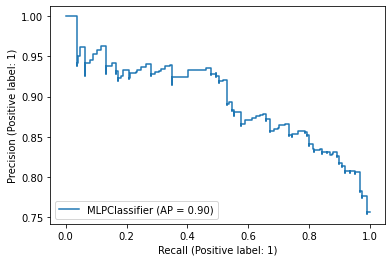

In [12]:
disp = plot_precision_recall_curve(classifier1, X_test, y_test)

In [13]:
#fitting model with naive bayes
classifier2=GaussianNB()
classifier2.fit(X_train2,y_train2)

#predicting output
y_pred_nb=classifier2.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_nb)
accuracy_score_nb=metrics.accuracy_score(y_test,y_pred_nb)
print('Naive Bayes Classifier')
print("accuracy_score{:.4f}".format(accuracy_score_nb))

#for precision
precision_nb=metrics.precision_score(y_test,y_pred_nb,average='weighted')
print("precision_score={:.4f}".format(precision_nb))

#for  recall
recall_nb=metrics.recall_score(y_test,y_pred_nb,average='weighted')
print("recall_score={:.4f}".format(recall_nb))

#for  f-score
fscore_nb=metrics.f1_score(y_test,y_pred_nb,average='weighted')
print("f-score={:.4f}".format(fscore_nb))

ers = 1-accuracy_score_nb
print("Error Rate ={:.4f}".format(ers))


Naive Bayes Classifier
accuracy_score0.8889
precision_score=0.8897
recall_score=0.8889
f-score=0.8893
Error Rate =0.1111


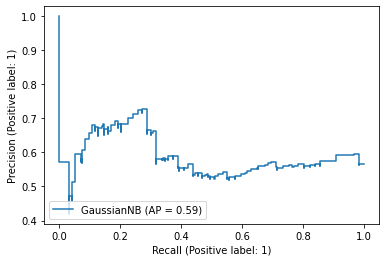

In [14]:
disp = plot_precision_recall_curve(classifier2, X_test, y_test)

In [15]:
#fitting our model with Deecision Tree
classifier3=DecisionTreeClassifier()
classifier3.fit(X_train2,y_train2)

#predicting output
y_pred_DT=classifier3.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_DT)
accuracy_score_DT=metrics.accuracy_score(y_test,y_pred_DT)
print('Decision Tree Classifier')
print("accuracy_score{:.4f}".format(accuracy_score_DT))

#for precision
precision_DT=metrics.precision_score(y_test,y_pred_DT,average='weighted')
print("precision_score={:.4f}".format(precision_DT))

#for  recall
recall_DT=metrics.recall_score(y_test,y_pred_DT,average='weighted')
print("recall_score={:.4f}".format(recall_DT))

#for f-score
fscore_DT=metrics.f1_score(y_test,y_pred_DT,average='weighted')
print("f-score={:.4f}".format(fscore_DT))

ers = 1-accuracy_score_DT
print("Error Rate ={:.4f}".format(ers))


Decision Tree Classifier
accuracy_score0.9859
precision_score=0.9873
recall_score=0.9859
f-score=0.9862
Error Rate =0.0141


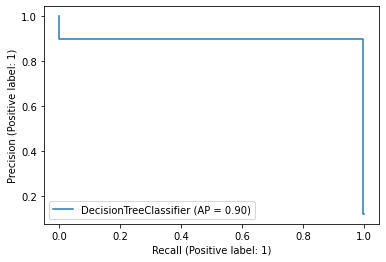

In [16]:
disp = plot_precision_recall_curve(classifier3, X_test, y_test)

In [17]:
#fitting our model with svm
from sklearn.svm import SVC
classifier4=SVC(probability=True,C=1.0, kernel='rbf', degree=3, gamma='auto')
classifier4.fit(X_train2,y_train2)

#predicting output
y_pred_svm=classifier4.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_svm)
accuracy_score_svm=metrics.accuracy_score(y_test,y_pred_svm)
print('Support vector Classifier')
print("accuracy_score{:.4f}".format(accuracy_score_svm))

#for precision
precision_svm=metrics.precision_score(y_test,y_pred_svm,average='weighted')
print("precision_score={:.4f}".format(precision_svm))

#for recall
recall_svm=metrics.recall_score(y_test,y_pred_svm,average='weighted')
print("recall_score={:.4f}".format(recall_svm))

#for f-score
fscore_svm=metrics.f1_score(y_test,y_pred_svm,average='weighted')
print("f-score={:.4f}".format(fscore_svm))

ers = 1-accuracy_score_svm
print("Error Rate ={:.4f}".format(ers))

Support vector Classifier
accuracy_score0.9651
precision_score=0.9729
recall_score=0.9651
f-score=0.9669
Error Rate =0.0349


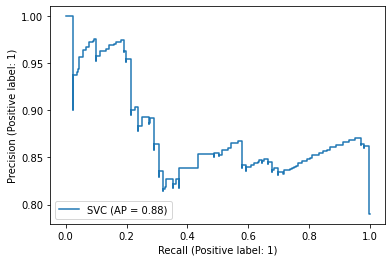

In [18]:
disp = plot_precision_recall_curve(classifier4, X_test, y_test)

In [19]:
#fitting model with KNeighborsClassifier
classifier5=KNeighborsClassifier(n_neighbors=5)
classifier5.fit(X_train2,y_train2)

#predicting output
y_pred_knn=classifier5.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_knn)
accuracy_score_knn=metrics.accuracy_score(y_test,y_pred_knn)
print('KNeighborsClassifier')
print("accuracy_score{:.4f}".format(accuracy_score_knn))

#for precision
precision_knn=metrics.precision_score(y_test,y_pred_knn,average='weighted')
print("precision_score={:.4f}".format(precision_knn))

#for recall
recall_knn=metrics.recall_score(y_test,y_pred_knn,average='weighted')
print("recall_score={:.4f}".format(recall_knn))

#for f-score
fscore_knn=metrics.f1_score(y_test,y_pred_knn,average='weighted')
print("f-score={:.4f}".format(fscore_knn))

ers = 1-accuracy_score_knn
print("Error Rate ={:.4f}".format(ers))

KNeighborsClassifier
accuracy_score0.9718
precision_score=0.9770
recall_score=0.9718
f-score=0.9730
Error Rate =0.0282


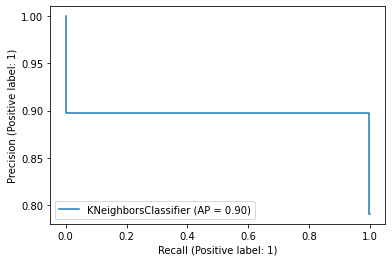

In [20]:
disp = plot_precision_recall_curve(classifier5, X_test, y_test)

In [21]:
#fitting model with RandomForest
classifier6=RandomForestClassifier()
classifier6.fit(X_train2,y_train2)

#predicting output
y_pred_rf=classifier6.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_rf)
accuracy_score_rf=metrics.accuracy_score(y_test,y_pred_rf)
print('RandomForest')
print("accuracy_score{:.4f}".format(accuracy_score_rf))

#for precision
precision_rf=metrics.precision_score(y_test,y_pred_rf,average='weighted')
print("precision_score={:.4f}".format(precision_rf))

#for recall
recall_rf=metrics.recall_score(y_test,y_pred_rf,average='weighted')
print("recall_score={:.4f}".format(recall_rf))

#for f-score
fscore_rf=metrics.f1_score(y_test,y_pred_rf,average='weighted')
print("f-score={:.4f}".format(fscore_rf))

ers = 1-accuracy_score_rf
print("Error Rate ={:.4f}".format(ers))

RandomForest
accuracy_score0.9838
precision_score=0.9857
recall_score=0.9838
f-score=0.9842
Error Rate =0.0162


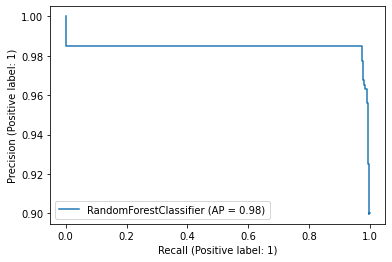

In [22]:
disp = plot_precision_recall_curve(classifier6, X_test, y_test)

In [23]:
#fitting model with LogisticRegression
classifier7=LogisticRegression()
classifier7.fit(X_train2,y_train2)

#predicting output
y_pred_lr=classifier7.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_lr)
accuracy_score_lr=metrics.accuracy_score(y_test,y_pred_lr)
print('LogisticRegression')
print("accuracy_score{:.4f}".format(accuracy_score_lr))

#for precision
precision_lr=metrics.precision_score(y_test,y_pred_lr,average='weighted')
print("precision_score={:.4f}".format(precision_lr))

#for recall
recall_lr=metrics.recall_score(y_test,y_pred_lr,average='weighted')
print("recall_score={:.4f}".format(recall_lr))

#for f-score
fscore_lr=metrics.f1_score(y_test,y_pred_lr,average='weighted')
print("f-score={:.4f}".format(fscore_lr))

ers = 1-accuracy_score_lr
print("Error Rate ={:.4f}".format(ers))

LogisticRegression
accuracy_score0.8934
precision_score=0.9223
recall_score=0.8934
f-score=0.9028
Error Rate =0.1066


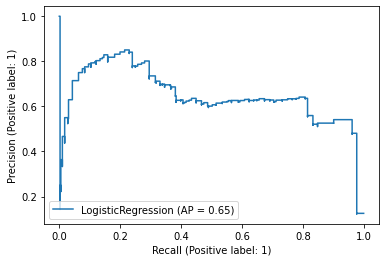

In [24]:
disp = plot_precision_recall_curve(classifier7, X_test, y_test)

In [25]:
#fitting model with AdaBoostClassifier
classifier8=AdaBoostClassifier()
classifier8.fit(X_train2,y_train2)

#predicting output
y_pred_AB=classifier8.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_AB)
accuracy_score_AB=metrics.accuracy_score(y_test,y_pred_AB)
print('GradientBoosting')
print("accuracy_score={:.4f}".format(accuracy_score_AB))

#for precision
precision_AB=metrics.precision_score(y_test,y_pred_AB,average='weighted')
print("precision_score={:.4f}".format(precision_AB))

#for recall
recall_AB=metrics.recall_score(y_test,y_pred_AB,average='weighted')
print("recall_score={:.4f}".format(recall_AB))

#for f-score
fscore_AB=metrics.f1_score(y_test,y_pred_AB,average='weighted')
print("f-score={:.4f}".format(fscore_AB))

ers = 1-accuracy_score_AB
print("Error Rate ={:.4f}".format(ers))

GradientBoosting
accuracy_score=0.9706
precision_score=0.9763
recall_score=0.9706
f-score=0.9719
Error Rate =0.0294


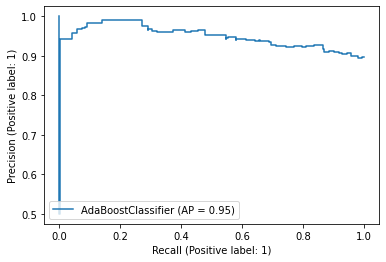

In [26]:
disp = plot_precision_recall_curve(classifier8, X_test, y_test)

In [27]:
#visualising plots
accuracy=np.array([accuracy_score_mlp,accuracy_score_nb,accuracy_score_DT,accuracy_score_svm,accuracy_score_knn,accuracy_score_rf,accuracy_score_lr,accuracy_score_AB])
precision=np.array([precision_mlp,precision_nb,precision_DT,precision_svm,precision_knn,precision_rf,precision_lr,precision_AB])
recall=np.array([recall_mlp,recall_nb,recall_DT,recall_svm,recall_knn,recall_rf,recall_lr,recall_AB])
fscore=np.array([fscore_knn,fscore_nb,fscore_DT,fscore_svm,fscore_knn,fscore_rf,fscore_lr,fscore_AB])
x=np.arange(len(accuracy))


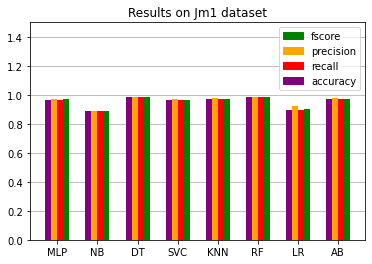

In [28]:
import matplotlib.patches as mpatches
bar_width=0.15
plt.bar(x,accuracy,width=bar_width,color='purple',zorder=2)
plt.bar(x+bar_width,precision,width=bar_width,color='orange',zorder=2)
plt.bar(x+bar_width*2,recall,width=bar_width,color='red',zorder=2)
plt.bar(x+bar_width*3,fscore,width=bar_width,color='green',zorder=2)


#for labeling part
plt.xticks(x+bar_width*1.5,['MLP','NB',"DT","SVC","KNN","RF","LR","AB"])
plt.title('Results on Jm1 dataset')

#for making patches
green=mpatches.Patch(color='purple',label='accuracy')
orange=mpatches.Patch(color='orange',label='precision')
red=mpatches.Patch(color='red',label='recall')
purple=mpatches.Patch(color='green',label='fscore')
plt.legend(handles=[purple,orange,red,green])
plt.ylim(0,1.5)

#grid
plt.grid(axis='y')

plt.show()


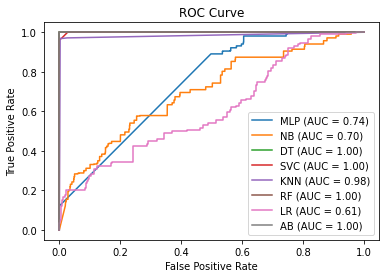

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score



X=data.iloc[:,:28]
y=data.iloc[:,-1]

X_train2, X_test, y_train2, y_test = train_test_split(X, y, test_size = 0.3)

# Train multiple classifiers
classifier1=MLPClassifier(activation = 'tanh',max_iter=1000,alpha= 0.0001)
classifier2=GaussianNB()
classifier3=DecisionTreeClassifier(random_state=42)
classifier4=SVC(probability=True,C=1.0, kernel='rbf', degree=3, gamma='auto')
classifier5=KNeighborsClassifier(n_neighbors=5)
classifier6=RandomForestClassifier()
classifier7= LogisticRegression(random_state=42)
classifier8=AdaBoostClassifier()
classifier1.fit(X_train2,y_train2)
classifier2.fit(X_train2,y_train2)
classifier3.fit(X_train2,y_train2)
classifier4.fit(X_train2,y_train2)
classifier5.fit(X_train2,y_train2)
classifier6.fit(X_train2,y_train2)
classifier7.fit(X_train2,y_train2)
classifier8.fit(X_train2,y_train2)

# Obtain predicted probabilities for each classifier
y_pred_prob1 = classifier1.predict_proba(X_test)[:, 1]
y_pred_prob2 = classifier2.predict_proba(X_test)[:, 1]
y_pred_prob3 = classifier3.predict_proba(X_test)[:, 1]
y_pred_prob4 = classifier4.predict_proba(X_test)[:, 1]
y_pred_prob5 = classifier5.predict_proba(X_test)[:, 1]
y_pred_prob6 = classifier8.predict_proba(X_test)[:, 1]
y_pred_prob7 = classifier7.predict_proba(X_test)[:, 1]
y_pred_prob8 = classifier8.predict_proba(X_test)[:, 1]

# Calculate FPR and TPR for each classifier
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob2)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_prob3)
fpr4, tpr4, _ = roc_curve(y_test, y_pred_prob4)
fpr5, tpr5, _ = roc_curve(y_test, y_pred_prob5)
fpr6, tpr6, _ = roc_curve(y_test, y_pred_prob6)
fpr7, tpr7, _ = roc_curve(y_test, y_pred_prob7)
fpr8, tpr8, _ = roc_curve(y_test, y_pred_prob8)

# Calculate AUC for each classifier
auc1 = roc_auc_score(y_test, y_pred_prob1)
auc2 = roc_auc_score(y_test, y_pred_prob2)
auc3 = roc_auc_score(y_test, y_pred_prob3)
auc4 = roc_auc_score(y_test, y_pred_prob4)
auc5 = roc_auc_score(y_test, y_pred_prob5)
auc6 = roc_auc_score(y_test, y_pred_prob6)
auc7 = roc_auc_score(y_test, y_pred_prob7)
auc8 = roc_auc_score(y_test, y_pred_prob8)

# Plot ROC curve for each classifier
plt.plot(fpr1, tpr1, label='MLP (AUC = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, label='NB (AUC = %0.2f)' % auc2)
plt.plot(fpr3, tpr3, label='DT (AUC = %0.2f)' % auc3)
plt.plot(fpr4, tpr4, label='SVC (AUC = %0.2f)' % auc4)
plt.plot(fpr5, tpr5, label='KNN (AUC = %0.2f)' % auc5)
plt.plot(fpr6, tpr6, label='RF (AUC = %0.2f)' % auc6)
plt.plot(fpr7, tpr7, label='LR (AUC = %0.2f)' % auc7)
plt.plot(fpr8, tpr8, label='AB (AUC = %0.2f)' % auc8)
# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
